In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [2]:
dataset = pd.read_excel (r'D:\UiS\TEST\dataset.xlsx')
dataset

,mNaCl (m/kg),Pressure (bar),Temperature (K),CO2 Solubility (mol/k)
0,4.673,1384.526,564.290,2.703131
1,2.898,693.155,438.170,1.726514
2,4.444,43.606,473.690,0.155367
3,5.914,1187.405,457.330,1.730431
4,4.285,525.961,492.780,1.128860
...,...,...,...,...
595,3.606,1270.190,480.631,1.912728
596,5.877,855.610,357.559,1.722254
597,4.575,721.742,447.564,1.354968
598,3.872,1241.561,456.420,1.855347


In [3]:
s = setup(dataset, target = 'CO2 Solubility (mol/k)') 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3162
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(600, 4)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
catboost_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1727,0.0786,0.2803,0.9323,0.1122,0.2038
1,0.1710,0.0618,0.2486,0.8649,0.1026,0.1708
2,0.1984,0.1093,0.3306,0.9158,0.1486,0.4430
3,0.3579,0.5221,0.7226,0.7904,0.1451,0.1338
4,0.2205,0.0990,0.3146,0.9632,0.1160,0.1749
5,0.2559,0.1767,0.4204,0.8836,0.1625,0.2020
6,0.2176,0.1334,0.3652,0.8401,0.1960,0.8352
7,0.1629,0.0744,0.2728,0.9299,0.0656,0.0887
8,0.1284,0.0458,0.2140,0.9082,0.0901,0.1374
9,0.1454,0.0523,0.2286,0.9430,0.1314,0.9620


In [5]:
pred_holdout = predict_model(catboost_model) #predictions on hold-out / test set

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2152,0.1689,0.411,0.9044,0.1511,0.4674


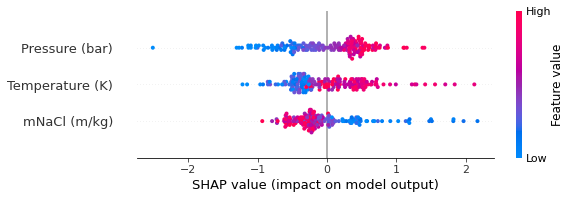

In [6]:
interpret_model(catboost_model)

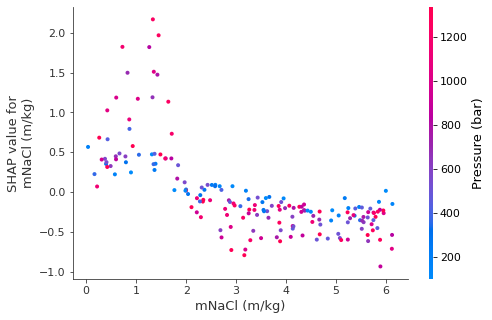

In [7]:
interpret_model(catboost_model, plot = 'correlation')

In [8]:
interpret_model(catboost_model, plot = 'reason', observation = 10)

In [9]:
save_model(catboost_model, model_name = 'deployment_30112020')

Transformation Pipeline and Model Succesfully Saved


In [10]:
deployment_30112020 = load_model('deployment_30112020')

Transformation Pipeline and Model Sucessfully Loaded


In [11]:
deployment_30112020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='CO2 Solubility (mol/k)',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catag...
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='CO2 Solubility (mol/k)')),
                 ('fix_perfect', Remove_100(target='CO2 Solubility (mol/k)')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 <catboost.core.CatBoostRegressor at 0x20c358d1a20>,
 None]